In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import astropy.stats as ast
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [25]:
import ipywidgets as widgets


In [3]:
gas=pd.read_csv("sco-cen.csv",index_col=0)

In [33]:
pctokm=float((1*u.pc).to(u.km)/u.km)
yrtos=(1*u.yr).to(u.s)
tstep=float(yrtos*1e5/u.s) # 100k years

In [67]:
def view_image(it):
    cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
    cevp=cev/pctokm
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(cevp[:,0],cevp[:,1],cevp[:,2])
    ax.set_xlim3d([-8400, -8000])
    ax.set_xlabel('X')

    ax.set_ylim3d([-4500, 0])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-10, 120])
    ax.set_zlabel('Z')

In [406]:
list(range(3))*3

[0, 1, 2, 0, 1, 2, 0, 1, 2]

12


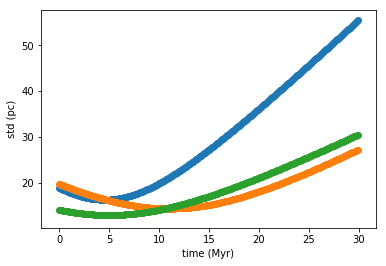

6.0


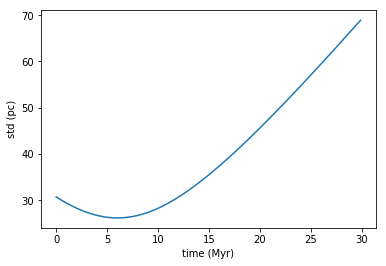

In [409]:
cgas=gas[gas.id==1]
cgas=cgas.drop([cgas.index[0]])
#cgas=cgas.drop([cgas.index[6]])
cgas=cgas.drop([cgas.index[2]])
#cgas=cgas.drop([cgas.index[5]])
mat=np.zeros(3)
print(len(cgas))
time=[]
amax=[]
devl=[]
tex=[]
stix=[]
for it in range(300):
    cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
    mat=np.vstack((mat,cev/pctokm))
    devl+=[np.std(cev,axis=0)/pctokm]
    amax+=[np.argmax(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    time+=[it/10]
    tex+=[it/10]*len(cev)
    stix+=list(range(len(cev)))
devl=np.array(devl)
for i in range(3):
    plt.scatter(time,devl[:,i])
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()
plt.plot(time,np.linalg.norm(devl,axis=1))
print(time[np.argmin(np.linalg.norm(devl,axis=1))])
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()

In [413]:
mat=mat[1:]
pd.DataFrame({'Id':stix,'t (Myr)':tex,'x (pc)':mat[:,0],'y (pc)':mat[:,1],'z (pc)':mat[:,2]}).to_csv("ages_ucl.csv")

In [210]:
widgets.interact(view_image,it=widgets.IntSlider(min=0, max=200, step=10))

interactive(children=(IntSlider(value=0, description='it', max=200, step=10), Output()), _dom_classes=('widget…

<function __main__.view_image>

In [206]:
amax

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5]

16


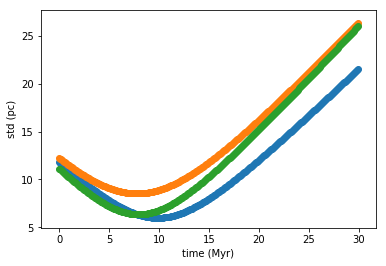

8.4


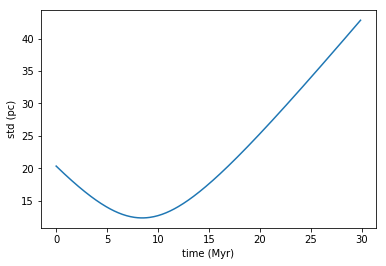

In [428]:
cgas=gas[gas.id==2]
cgas=cgas.drop([cgas.index[10]])
cgas=cgas.drop([cgas.index[16]])
cgas=cgas.drop([cgas.index[5]])
cgas=cgas.drop([cgas.index[1]])
cgas=cgas.drop([cgas.index[1]])
cgas=cgas.drop([cgas.index[5]])
cgas=cgas.drop([cgas.index[12]])
cgas=cgas.drop([cgas.index[16]])
print(len(cgas))
time=[]
amax=[]
devl=[]
mat=np.zeros(3)
tex=[]
stix=[]
for it in range(300):
    cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
    devl+=[np.std(cev,axis=0)/pctokm]
    amax+=[np.argmax(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    time+=[it/10]
    mat=np.vstack((mat,cev/pctokm))
    tex+=[it/10]*len(cev)
    stix+=list(range(len(cev)))
devl=np.array(devl)
for i in range(3):
    plt.scatter(time,devl[:,i])
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()
plt.plot(time,np.linalg.norm(devl,axis=1))
print(time[np.argmin(np.linalg.norm(devl,axis=1))])
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()

In [429]:
len(mat)

4801

In [430]:
mat=mat[1:]
pd.DataFrame({'Id':stix,'t (Myr)':tex,'x (pc)':mat[:,0],'y (pc)':mat[:,1],'z (pc)':mat[:,2]}).to_csv("ages_lcc.csv")

In [190]:
widgets.interact(view_image,it=widgets.IntSlider(min=0, max=120, step=10))

interactive(children=(IntSlider(value=0, description='it', max=120, step=10), Output()), _dom_classes=('widget…

<function __main__.view_image>

12


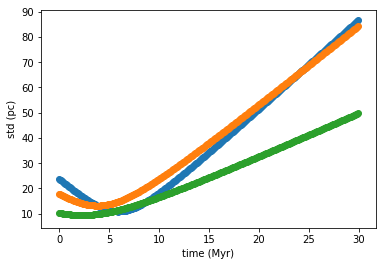

4.7


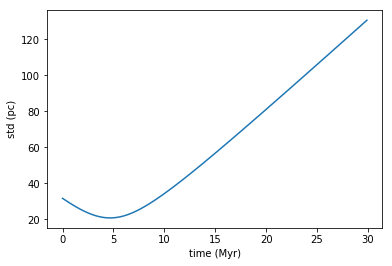

In [437]:
cgas=gas[gas.id==4]
cgas=cgas.drop([cgas.index[7]])
#cgas=cgas.drop([cgas.index[1]])
print(len(cgas))
time=[]
amax=[]
devl=[]
mat=np.zeros(3)
tex=[]
stix=[]
for it in range(300):
    cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
    devl+=[np.std(cev,axis=0)/pctokm]
    amax+=[np.argmax(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    time+=[it/10]
    mat=np.vstack((mat,cev/pctokm))
    tex+=[it/10]*len(cev)
    stix+=list(range(len(cev)))
devl=np.array(devl)
for i in range(3):
    plt.scatter(time,devl[:,i])
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()
plt.plot(time,np.linalg.norm(devl,axis=1))
print(time[np.argmin(np.linalg.norm(devl,axis=1))])
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()

In [438]:
mat=mat[1:]
pd.DataFrame({'Id':stix,'t (Myr)':tex,'x (pc)':mat[:,0],'y (pc)':mat[:,1],'z (pc)':mat[:,2]}).to_csv("ages_twhya.csv")

In [281]:
amax[-5:]

[1, 1, 1, 1, 1]

In [297]:
widgets.interact(view_image,it=widgets.IntSlider(min=0, max=200, step=10))

interactive(children=(IntSlider(value=0, description='it', max=200, step=10), Output()), _dom_classes=('widget…

<function __main__.view_image>

28


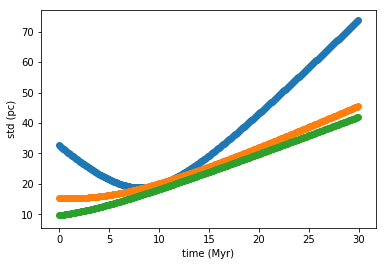

5.9


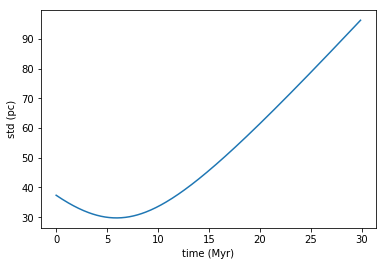

In [435]:
cgas=gas[gas.id==5]
cgas=cgas.drop([cgas.index[38],cgas.index[40]])
cgas=cgas.drop([cgas.index[22]])
cgas=cgas.drop([cgas.index[41]])
cgas=cgas.drop([cgas.index[37]])
cgas=cgas.drop([cgas.index[9]])
cgas=cgas.drop([cgas.index[10]])
cgas=cgas.drop([cgas.index[3]])
cgas=cgas.drop([cgas.index[17]])
cgas=cgas.drop([cgas.index[2]])
cgas=cgas.drop([cgas.index[19]])
cgas=cgas.drop([cgas.index[33]])
cgas=cgas.drop([cgas.index[27]])
cgas=cgas.drop([cgas.index[10]])
cgas=cgas.drop([cgas.index[0]])
cgas=cgas.drop([cgas.index[7]])
cgas=cgas.drop([cgas.index[19]])
cgas=cgas.drop([cgas.index[12]])
print(len(cgas))
time=[]
amax=[]
devl=[]
mat=np.zeros(3)
tex=[]
stix=[]
for it in range(300):
    cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
    devl+=[np.std(cev,axis=0)/pctokm]
    amax+=[np.argmax(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    time+=[it/10]
    mat=np.vstack((mat,cev/pctokm))
    tex+=[it/10]*len(cev)
    stix+=list(range(len(cev)))
devl=np.array(devl)
for i in range(3):
    plt.scatter(time,devl[:,i])
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()
plt.plot(time,np.linalg.norm(devl,axis=1))
print(time[np.argmin(np.linalg.norm(devl,axis=1))])
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()

In [387]:
widgets.interact(view_image,it=widgets.IntSlider(min=0, max=150, step=10))

interactive(children=(IntSlider(value=0, description='it', max=150, step=10), Output()), _dom_classes=('widget…

<function __main__.view_image>

In [436]:
mat=mat[1:]
pd.DataFrame({'Id':stix,'t (Myr)':tex,'x (pc)':mat[:,0],'y (pc)':mat[:,1],'z (pc)':mat[:,2]}).to_csv("ages_bpic.csv")

In [456]:
cgas=gas[gas.id==3]
di=100000
#cgas=cgas.drop([cgas.index[7]])
#cgas=cgas.drop([cgas.index[1]])
for i in range(100):
    if i!=0:
        cgas=cgas.drop([cgas.index[di]]) 
    print(len(cgas))
    time=[]
    amax=[]
    devl=[]
    mat=np.zeros(3)
    tex=[]
    stix=[]
    for it in range(400):
        cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
        devl+=[np.std(cev,axis=0)/pctokm]
        amax+=[np.argmax(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
        time+=[it/10]
        mat=np.vstack((mat,cev/pctokm))
        tex+=[it/10]*len(cev)
        stix+=list(range(len(cev)))
    devl=np.array(devl)
    di=amax[-1]
#    for i in range(3):
#        plt.scatter(time,devl[:,i])
#    plt.xlabel("time (Myr)")
#    plt.ylabel("std (pc)")
#    plt.show()
#    plt.plot(time,np.linalg.norm(devl,axis=1))
    print(time[np.argmin(np.linalg.norm(devl,axis=1))])
#    plt.xlabel("time (Myr)")
#    plt.ylabel("std (pc)")
#    plt.show()

123
0.0
122
0.0
121
0.0
120
0.3
119
0.1
118
0.0
117
0.1
116
0.1
115
0.0
114
0.0
113
0.0
112
0.0
111
0.0
110
0.0
109
0.0
108
0.0
107
0.0
106
0.0
105
0.0
104
0.0
103
0.0
102
0.0
101
0.0
100
0.0
99
0.0
98
0.0
97
0.0
96
0.0
95
0.0
94
0.0
93
0.0
92
0.0
91
0.0
90
0.0
89
0.0
88
0.0
87
0.1
86
0.2
85
0.1
84
0.1
83
0.2
82
0.3
81
0.3
80
0.4
79
0.7
78
0.9
77
0.9
76
0.8
75
1.0
74
1.0
73
0.9
72
1.2
71
1.1
70
1.1
69
1.0
68
1.0
67
1.0
66
1.0
65
1.1
64
1.1
63
1.3
62
1.2
61
1.3
60
1.3
59
1.5
58
1.5
57
1.4
56
1.4
55
1.3
54
1.5
53
1.3
52
1.2
51
1.2
50
1.3
49
1.3
48
1.5
47
1.5
46
1.5
45
1.5
44
1.6
43
1.6
42
1.3
41
1.5
40
1.4
39
1.5
38
1.3
37
1.5
36
1.7
35
2.0
34
2.0
33
2.3
32
2.1
31
1.9
30
1.8
29
2.0
28
1.3
27
1.5
26
2.0
25
2.0
24
2.1


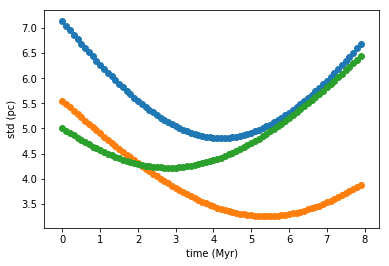

4.1


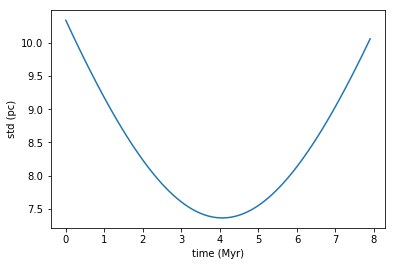

In [455]:
    for i in range(3):
        plt.scatter(time,devl[:,i])
    plt.xlabel("time (Myr)")
    plt.ylabel("std (pc)")
    plt.show()
    plt.plot(time,np.linalg.norm(devl,axis=1))
    print(time[np.argmin(np.linalg.norm(devl,axis=1))])
    plt.xlabel("time (Myr)")
    plt.ylabel("std (pc)")
    plt.show()